<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-dipti/Exercises/day-8/Text_Cleaning_Tokenization/NLP%20Lab_%20Cleaning%20and%20Tokenization%20of%20Customer%20Rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP Lab: Cleaning and Tokenization of Customer Reviews

##Objective
Build a reusable text-preprocessing pipeline to clean, normalize, and tokenize a set of “messy” product reviews. You will compare multiple tokenization methods and visualize token frequencies.


###Dataset
Create a list of 10 messy customer review strings, for example:

reviews = [
  "Absolutely LOVED this product!!! Will buy again 😊 Visit http://shop.example.com",

  "Worst purchase ever... arrived broken, no response from support @helpdesk",

  "Ok quality; does the job. 5/5 stars! #satisfied",

  "Email me at user@example.org for details about bulk order!!!",

  "Super overpriced!! Paid $299 but performance is meh...",

  "<div>Great build quality</div><p>But shipping was slow</p>",

  "Contact: +44 20 7946 0958 or (020)79460958",

  "MixedCASE and random123numbers and symbols %^&*",

  "Line1\nLine2\tTabbed text\r\nEnd of review",

  "Contractions—can't, won't, shouldn't—are common here."
]

###Tasks
**Implement Cleaning Functions**

Remove URLs, email addresses, HTML tags, phone numbers, social media mentions/hashtags, and non-alphanumeric symbols (except whitespace and apostrophes).

Normalize whitespace and convert text to lowercase.

**Compare Tokenization Methods**

Apply at least three methods to one cleaned review:
Simple split()

NLTK word_tokenize

spaCy tokenization

(Bonus) Regex-based tokenization

**Aggregate and Visualize**
Tokenize all cleaned reviews using your chosen method (e.g., regex).

Compute the frequency distribution of tokens across the dataset.

Plot the top 10 most frequent tokens with matplotlib or seaborn.

**Analysis**
Briefly comment on the differences observed between tokenization methods.

Discuss any surprising tokens in the top 10 and suggest why they appear so often.

###Deliverables
A Colab notebook implementing the cleaning pipeline as reusable functions.

Demonstrations of each tokenization method on one sample review.

A bar chart of the top 10 tokens after processing all reviews.

Written comments summarizing your observations and analysis.

In [1]:
!pip install --quiet nltk spacy beautifulsoup4 seaborn

# Download NLTK data
import nltk
nltk.download('punkt')

# Download spaCy model
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
reviews = [
  "Absolutely LOVED this product!!! Will buy again 😊 Visit http://shop.example.com",
  "Worst purchase ever... arrived broken, no response from support @helpdesk",
  "Ok quality; does the job. 5/5 stars! #satisfied",
  "Email me at user@example.org for details about bulk order!!!",
  "Super overpriced!! Paid $299 but performance is meh...",
  "<div>Great build quality</div><p>But shipping was slow</p>",
  "Contact: +44 20 7946 0958 or (020)79460958",
  "MixedCASE and random123numbers and symbols %^&*",
  "Line1\nLine2\tTabbed text\r\nEnd of review",
  "Contractions—can't, won't, shouldn't—are common here."
]
print("Sample Messy Texts:")
print("=" * 50)
for i, text in enumerate(reviews, 1):
    print(f"{i:2d}. {repr(text)}")

Sample Messy Texts:
 1. 'Absolutely LOVED this product!!! Will buy again 😊 Visit http://shop.example.com'
 2. 'Worst purchase ever... arrived broken, no response from support @helpdesk'
 3. 'Ok quality; does the job. 5/5 stars! #satisfied'
 4. 'Email me at user@example.org for details about bulk order!!!'
 5. 'Super overpriced!! Paid $299 but performance is meh...'
 6. '<div>Great build quality</div><p>But shipping was slow</p>'
 7. 'Contact: +44 20 7946 0958 or (020)79460958'
 8. 'MixedCASE and random123numbers and symbols %^&*'
 9. 'Line1\nLine2\tTabbed text\r\nEnd of review'
10. "Contractions—can't, won't, shouldn't—are common here."


In [8]:
import re
from bs4 import BeautifulSoup

def clean_review(text):
    text = BeautifulSoup(text, "html.parser").get_text()                       # Remove HTML
    text = re.sub(r"http\S+|www\S+", "", text)                                 # Remove URLs
    text = re.sub(r"\S+@\S+", "", text)                                        # Remove emails
    text = re.sub(r"@\w+|#\w+", "", text)                                      # Remove mentions/hashtags
    text = re.sub(r"\+?\(?\d{2,4}\)?[\s.-]?\d{3,4}[\s.-]?\d{3,4}", "", text)    # Remove phone numbers
    text = re.sub(r"[^\w\s']", " ", text)                                      # Remove special characters (keep apostrophes)
    text = re.sub(r"\s+", " ", text)                                           # Normalize whitespace
    return text.lower().strip()



In [9]:
for i, text in enumerate(reviews[:3], 1):  # Show first 3 examples
    print(f"\nExample {i}:")
    cleaned = clean_review(text)
    print(f"\nFinal result: '{cleaned}'")
    print("\n" + "="*80)


Example 1:

Final result: 'absolutely loved this product will buy again visit'


Example 2:

Final result: 'worst purchase ever arrived broken no response from support'


Example 3:

Final result: 'ok quality does the job 5 5 stars'



In [10]:
cleaned_reviews = [clean_review(review) for review in reviews]
for i, r in enumerate(cleaned_reviews, 1):
    print(f"{i}. {r}")


1. absolutely loved this product will buy again visit
2. worst purchase ever arrived broken no response from support
3. ok quality does the job 5 5 stars
4. email me at for details about bulk order
5. super overpriced paid 299 but performance is meh
6. great build qualitybut shipping was slow
7. contact 44 or
8. mixedcase and random123numbers and symbols
9. line1 line2 tabbed text end of review
10. contractions can't won't shouldn't are common here


In [11]:
sample = cleaned_reviews[0]
print("Sample cleaned review:", sample)


Sample cleaned review: absolutely loved this product will buy again visit


In [12]:
split_tokens = sample.split()
print("Split tokens:", split_tokens)


Split tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


In [19]:
import spacy
nlp = spacy.load("en_core_web_sm")
spacy_tokens = [token.text for token in nlp(sample)]
print("spaCy tokens:", spacy_tokens)


spaCy tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


In [20]:
regex_tokens = re.findall(r"\b\w+(?:'\w+)?\b", sample)
print("Regex tokens:", regex_tokens)


Regex tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


In [21]:
from collections import Counter

all_tokens = []
for review in cleaned_reviews:
    tokens = re.findall(r"\b\w+(?:'\w+)?\b", review)
    all_tokens.extend(tokens)

freq_dist = Counter(all_tokens)


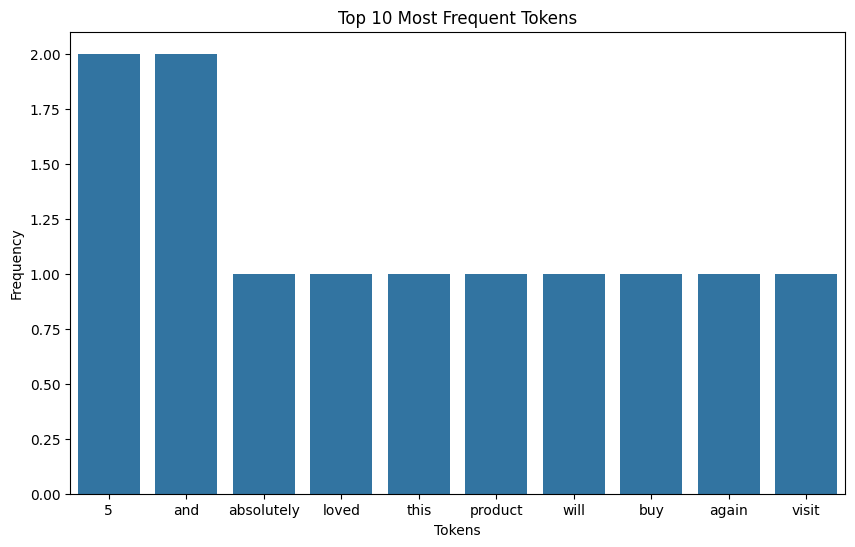

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

top_tokens = freq_dist.most_common(10)
tokens, counts = zip(*top_tokens)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(tokens), y=list(counts))
plt.title("Top 10 Most Frequent Tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()
